## Loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import os

In [2]:
#Setting path
os.chdir("E:/1ST SEM/eng/edwisor_assignments/10.intern")


## Fetching Dataset

In [3]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data',
    header=None,
    sep=',',
    )

C:\Users\HP\it\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Dataset

In [4]:
df.to_csv("given_dataset.csv", index = False)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


## Missing value Analysis

In [5]:
df= df.replace('[?]', np.nan, regex=True)

In [6]:
df[0]=df[0].fillna(df[0].median())

In [7]:
df[1]=df[1].fillna(df[1].median())

In [8]:
df[2]=df[2].fillna(df[2].median())

In [9]:
df[3]=df[3].fillna(df[3].median())
df[3]=np.round(df[3].astype(int))

In [10]:
Missing = pd.DataFrame(df.isnull().sum())
Missing = Missing.reset_index()
Missing = Missing.rename(columns={'index':'Variable',0:'Missing %'})
Missing['Missing %'] = (Missing['Missing %'] / len(df))*100
Missing = Missing.sort_values('Missing %',ascending=False).reset_index(drop=True)
Missing

,Variable,Missing %
0,0,0.0
1,1024,0.0
2,1046,0.0
3,1045,0.0
4,1044,0.0
5,1043,0.0
6,1042,0.0
7,1041,0.0
8,1040,0.0
9,1039,0.0


In [11]:
df[2] = df[2].apply(np.float64)
df[1] = df[1].apply(np.float64)
df[0] = df[0].apply(np.float64)

In [12]:
import numpy as np
df[3]=np.round(df[3].astype(int))
df[2]=np.round(df[2].astype(int))
df[1]=np.round(df[1].astype(int))
df[0]=np.round(df[0].astype(int))

## Outlier Analysis

In [13]:
import numpy as np
for i in range(0,3):
    
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(df[i], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25

    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    #Replace with NA
    df.loc[df[i] < minimum,:i] = np.nan
    df.loc[df[i] > maximum,:i] = np.nan

In [14]:
Missing = pd.DataFrame(df.isnull().sum())
Missing = Missing.reset_index()
Missing = Missing.rename(columns={'index':'Variable',0:'Missing %'})
Missing['Missing %'] = (Missing['Missing %'] / len(df))*100
Missing = Missing.sort_values('Missing %',ascending=False).reset_index(drop=True)
Missing

,Variable,Missing %
0,0,29.734675
1,1,18.694724
2,2,13.906679
3,1024,0.000000
4,1046,0.000000
5,1045,0.000000
6,1044,0.000000
7,1043,0.000000
8,1042,0.000000
9,1041,0.000000


## Assigning levels to categorical variable

In [15]:
#assigning levels to categorical varibales
for i in range(1557, df.shape[1]):
    if(df.iloc[:,i].dtypes == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        df.iloc[:,i] = df.iloc[:,i].cat.codes

In [16]:
df=df.apply(lambda x:x.fillna(x.median()),axis=0)

In [17]:
Missing = pd.DataFrame(df.isnull().sum())
Missing = Missing.reset_index()
Missing = Missing.rename(columns={'index':'Variable',0:'Missing %'})
Missing['Missing %'] = (Missing['Missing %'] / len(df))*100
Missing = Missing.sort_values('Missing %',ascending=False).reset_index(drop=True)
Missing

,Variable,Missing %
0,0,0.0
1,1024,0.0
2,1046,0.0
3,1045,0.0
4,1044,0.0
5,1043,0.0
6,1042,0.0
7,1041,0.0
8,1040,0.0
9,1039,0.0


## Data after preprocessing

In [18]:
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
3259,51.0,110.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3260,11.0,64.0,5.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3261,51.0,110.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3262,51.0,200.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3263,16.0,16.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3264,51.0,184.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3265,23.0,26.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3266,40.0,130.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3267,51.0,192.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3268,25.0,100.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
for i in range(3,1559):
    df[i]=df[i].astype('category')

In [20]:
train_targets = df[1558]

In [21]:
Nnames=[0,1,2]

## Correlation Analysis

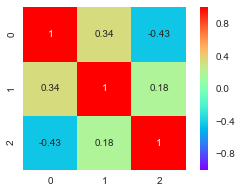

In [22]:
df_corr =df.loc[:,Nnames]
%matplotlib inline
#correlation analysis
#set height and width of plot
f , ax = plt.subplots(figsize = (5,3))
#generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='rainbow',annot=True,
            square=True, ax=ax)
#sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),
#square = True, ax=ax)

In [23]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

## chi square test of independence

In [24]:
#chi square test of independence
for i in range(3,1558):
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[1558],df[i]))
    print(p)
    if(p<0.05):
        del df[i]
        


3
0.642987784910533
4
0.25982109733207476
5
0.023427626637117633
6
0.2327988501032509
7
0.36541619353259536
8
0.29048700145141804
9
5.796607078315548e-30
10
0.36541619353259536
11
9.913298478192449e-22
12
0.05051069928781098
13
0.2327988501032509
14
9.913298478192449e-22
15
0.29048700145141804
16
0.16888864202571496
17
0.3254250719092113
18
0.20890709764358634
19
0.3254250719092113
20
1.4267456402622108e-13
21
2.267362717218736e-20
22
0.2327988501032509
23
0.25982109733207476
24
0.3254250719092113
25
0.3254250719092113
26
2.7151413780519425e-16
27
0.13713075600978644
28
0.36541619353259536
29
0.25982109733207476
30
0.3254250719092113
31
1.3097381093696737e-08
32
0.021308195743642636
33
0.05051069928781098
34
0.004358622524748439
35
0.18772174219318682
36
1.4267456402622108e-13
37
0.36541619353259536
38
0.2327988501032509
39
0.041606232058296506
40
0.36541619353259536
41
0.25982109733207476
42
0.061416177058758535
43
0.15210942447828496
44
0.3254250719092113
45
0.36541619353259536
46
0.

346
2.9042203170589774e-23
347
0.01815484563267081
348
0.97236457440989
349
0.3254250719092113
350
5.185713787672865e-19
351
2.5560147677455953e-194
352
0.36541619353259536
353
0.36541619353259536
354
0.5931447254673132
355
1.4267456402622108e-13
356
3.744641961379248e-20
357
7.799532663036514e-23
358
0.29048700145141804
359
0.00023256069761686148
360
0.3254250719092113
361
0.005752386882227631
362
0.13713075600978644
363
0.20890709764358634
364
0.36541619353259536
365
0.97236457440989
366
0.0015562136045917364
367
4.180438566850259e-16
368
0.41144724885901374
369
0.016980650667869503
370
5.185713787672865e-19
371
0.005752386882227631
372
9.110506696515934e-11
373
0.25982109733207476
374
0.25982109733207476
375
0.041606232058296506
376
0.13713075600978644
377
0.019896897921982723
378
0.20890709764358634
379
0.4008369836225566
380
0.7978650155003066
381
3.3392964470030125e-24
382
0.3254250719092113
383
0.25982109733207476
384
0.33871812824323383
385
0.15210942447828496
386
5.33409418858

1.1862844674726158e-17
689
0.41144724885901374
690
0.20890709764358634
691
0.6546479386689623
692
0.061416177058758535
693
0.12373609260337871
694
4.0433423829046185e-20
695
0.36541619353259536
696
0.7226733720043308
697
0.10097928547913841
698
0.3254250719092113
699
0.10097928547913841
700
0.017638458959872743
701
0.10097928547913841
702
0.41144724885901374
703
2.267362717218736e-20
704
1.4267456402622108e-13
705
0.7978650155003066
706
0.2327988501032509
707
0.41144724885901374
708
0.3254250719092113
709
2.7151413780519425e-16
710
0.9339107429033877
711
2.7151413780519425e-16
712
0.36541619353259536
713
0.97236457440989
714
0.15210942447828496
715
0.045834488804210725
716
0.48731131793667226
717
0.2997152438628175
718
0.41144724885901374
719
0.36541619353259536
720
1.1862844674726158e-17
721
0.2472726440359161
722
0.3254250719092113
723
1.1862844674726158e-17
724
0.18772174219318682
725
0.017638458959872743
726
0.41144724885901374
727
0.36541619353259536
728
0.25982109733207476
729
1.

1025
0.25982109733207476
1026
0.00044050430763910433
1027
0.41144724885901374
1028
0.13713075600978644
1029
0.8808825021451562
1030
0.8808825021451562
1031
0.13470716655982995
1032
0.25982109733207476
1033
0.36541619353259536
1034
0.41144724885901374
1035
3.60778380360332e-27
1036
0.10097928547913841
1037
0.3254250719092113
1038
0.03778078906441833
1039
0.20890709764358634
1040
1.0576923803198903e-36
1041
4.060844612152644e-08
1042
1.4267456402622108e-13
1043
0.00023256069761686148
1044
0.3254250719092113
1045
2.267362717218736e-20
1046
2.9822477812533053e-31
1047
3.743681901242009e-105
1048
1.4267456402622108e-13
1049
2.7151413780519425e-16
1050
0.0349606584377948
1051
0.41144724885901374
1052
1.5808315454765366e-43
1053
0.9271377082808918
1054
2.7151413780519425e-16
1055
6.21983741258841e-15
1056
0.25982109733207476
1057
2.267362717218736e-20
1058
1.7538590598890934e-65
1059
3.325230197986305e-16
1060
1.781997980999311e-45
1061
1.1862844674726158e-17
1062
0.005752386882227631
1063
0.

3.399916951985085e-136
1345
1.4267456402622108e-13
1346
5.185713787672865e-19
1347
1.2542093775695974e-13
1348
2.267362717218736e-20
1349
0.3254250719092113
1350
0.05016326841134455
1351
1.363734668068465e-06
1352
0.49418392272289013
1353
9.110506696515934e-11
1354
0.41144724885901374
1355
4.3332095746571564e-23
1356
0.36541619353259536
1357
1.4267456402622108e-13
1358
0.0003040262181226193
1359
7.495403614755599e-23
1360
0.41144724885901374
1361
5.185713787672865e-19
1362
1.0858880753687611e-57
1363
0.4647912897547247
1364
0.9997888007613704
1365
0.2327988501032509
1366
0.005752386882227631
1367
0.000334993100737824
1368
2.1249889782072553e-07
1369
0.36370503716377967
1370
0.20890709764358634
1371
0.9997888007613704
1372
0.41144724885901374
1373
5.111140042911057e-69
1374
0.25982109733207476
1375
0.2327988501032509
1376
6.852694320009387e-30
1377
0.09131649171766626
1378
0.41144724885901374
1379
0.36541619353259536
1380
5.628242411274195e-05
1381
0.25982109733207476
1382
0.00061710904

In [25]:
df.head()
d1=df

## Feature Scaling

In [26]:
#normalization
for i in Nnames:
    print(i)
    df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

df.head(10)

0
1
2


,0,1,2,3,4,6,7,8,10,12,...,1545,1546,1547,1548,1549,1550,1552,1553,1557,1558
0,0.44086,0.534884,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.44086,0.465116,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.44086,0.465116,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#loading libraries for model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\HP\it\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
df[1558]=df[1558].replace(0,'ad')
df[1558]=df[1558].replace(1,'nonad')

In [29]:
df.head(2)

,0,1,2,3,4,6,7,8,10,12,...,1545,1546,1547,1548,1549,1550,1552,1553,1557,1558
0,0.44086,0.534884,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
1,0.44086,0.465116,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad


In [30]:
df.shape

(3279, 1046)

In [31]:
#replace target categories with yes or no
X=df.values[:,0:1045]
Y=df.values[:,1045]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## Decision tree model

In [32]:
#decision tree model
c50_model = tree.DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
c50_pred = c50_model.predict(X_test)

c50_pred

array(['nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'ad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'ad', 'nonad', 'nonad', 'ad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'ad', 'nonad', 'nonad', 'ad',
       'nonad', 'nonad', 'ad', 'nonad', 'nonad', 'nonad', 'nonad', 'ad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad'

In [33]:
#dot file to look at decision tree
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(c50_model, out_file=dotfile, feature_names = df.columns)


In [34]:
#testing accuracy of model
from sklearn.metrics import confusion_matrix
CM = pd.crosstab(y_test, c50_pred)
CM

col_0,ad,nonad
row_0,,
ad,35,51
nonad,25,545


In [35]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
accuracy_score(y_test,c50_pred)*100

88.41463414634147

In [36]:
#FNR 
(FN*100)/(FN+TP)

4.385964912280702

In [37]:
#Recall
(TP*100)/(TP+FN)


95.6140350877193

In [38]:
d2=y_test
d2=pd.DataFrame(d2)
move = pd.DataFrame(c50_pred)
move = move.rename(columns = {0:'move'})

d2 = d2.join(move['move'])

d2.to_csv("prediction_using_decision_tree.csv", index = False)

## Cross Validation

In [39]:
# 10-fold cross-validation with logistic regression
print(cross_val_score(c50_model, X, Y, cv=10, scoring='accuracy').mean())

0.8475143581711047


## Random Forest

In [40]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train,y_train)
RF_prediction = RF_model.predict(X_test)


RF_prediction

array(['nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'ad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'ad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'nonad', 'nonad', 'nonad', 'ad', 'nonad',
       'nonad', 'ad', 'nonad', 'nonad', 'ad', 'nonad', 'nonad', 'nonad',
       'nonad', 'ad', 'nonad', 'nonad', 'nonad', 'nonad', 'nonad',
       'nonad', 'nonad', 'non

In [41]:
CM = pd.crosstab(y_test, RF_prediction)
CM


#((TP+TN)*100)/(TP+TN+FP+FN)
#accuracy = 88.26
#(FN*100)/(FN+TP)
#FNR = 3.83

col_0,ad,nonad
row_0,,
ad,37,49
nonad,17,553


In [42]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
accuracy_score(y_test, RF_prediction)*100

89.9390243902439

In [43]:
#FNR 
(FN*100)/(FN+TP)

2.982456140350877

In [44]:
#Recall
(TP*100)/(TP+FN)


97.01754385964912

In [45]:
d3=y_test
d3=pd.DataFrame(d3)
move = pd.DataFrame(RF_prediction)
move = move.rename(columns = {0:'move'})

d3 = d3.join(move['move'])

d3.to_csv("prediction_using_decision_tree.csv", index = False)

## Cross Validation

In [46]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(RF_model, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.88109756 0.86280488 0.84146341 0.87804878 0.88414634 0.8902439
 0.86585366 0.85060976 0.84756098 0.83180428]


## kNN

In [47]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)

#predict test cases
KNN_Predictions = KNN_model.predict(X_test)



In [48]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)
CM



col_0,ad,nonad
row_0,,
ad,46,40
nonad,64,506


In [49]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
accuracy_score(y_test, KNN_Predictions)*100


84.14634146341463

In [50]:
#FNR 
(FN*100)/(FN+TP)

11.228070175438596

In [51]:
#Recall
(TP*100)/(TP+FN)


88.7719298245614

In [52]:
## Cross Validation

In [53]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(KNN_model, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.79878049 0.83536585 0.77439024 0.82926829 0.875      0.84756098
 0.85670732 0.8445122  0.85670732 0.80733945]


In [54]:
d4=y_test
d4=pd.DataFrame(d4)
move = pd.DataFrame(KNN_Predictions)
move = move.rename(columns = {0:'move'})

d4 = d4.join(move['move'])

d4.to_csv("prediction_using_knn.csv", index = False)

## Naive Bayes

In [55]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train,y_train)

#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [56]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)
CM



col_0,ad,nonad
row_0,,
ad,75,11
nonad,199,371


In [57]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
accuracy_score(y_test, NB_Predictions)*100

67.98780487804879

In [58]:
#FNR 
(FN*100)/(FN+TP)

34.91228070175438

In [59]:
#Recall
(TP*100)/(TP+FN)


65.08771929824562

In [60]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(NB_model, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.63414634 0.61585366 0.70426829 0.59146341 0.63109756 0.68597561
 0.70731707 0.71341463 0.71646341 0.72477064]


In [61]:
d5=y_test
d5=pd.DataFrame(d5)
move = pd.DataFrame(NB_Predictions)
move = move.rename(columns = {0:'move'})

d5 = d5.join(move['move'])

d5.to_csv("prediction_using_naive_bayes.csv", index = False)